In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [14]:
data=pd.read_csv(r"C:\Users\manoj\Downloads\archive(26)\clean_data.csv")

In [15]:
data.head(5)

,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872,Ready to move,2,NaN,1.0,Sembakkam,MP Developers
1,93.54,1346,Under Construction,3,2.0,NaN,Selaiyur,DAC Promoters
2,151.00,2225,Under Construction,3,NaN,0.0,Mogappair,Casagrand Builder Private Limited
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd


In [16]:
data.tail(5)

,price,area,status,bhk,bathroom,age,location,builder
2615,27.5,750,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties
2616,27.5,750,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties
2617,30.0,800,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties
2618,31.5,850,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties
2619,34.0,900,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties


In [17]:
data.isna().sum()

price          0
area           0
status         0
bhk            0
bathroom    1217
age          891
location       0
builder        0
dtype: int64

Data Cleaning and Data Transformation

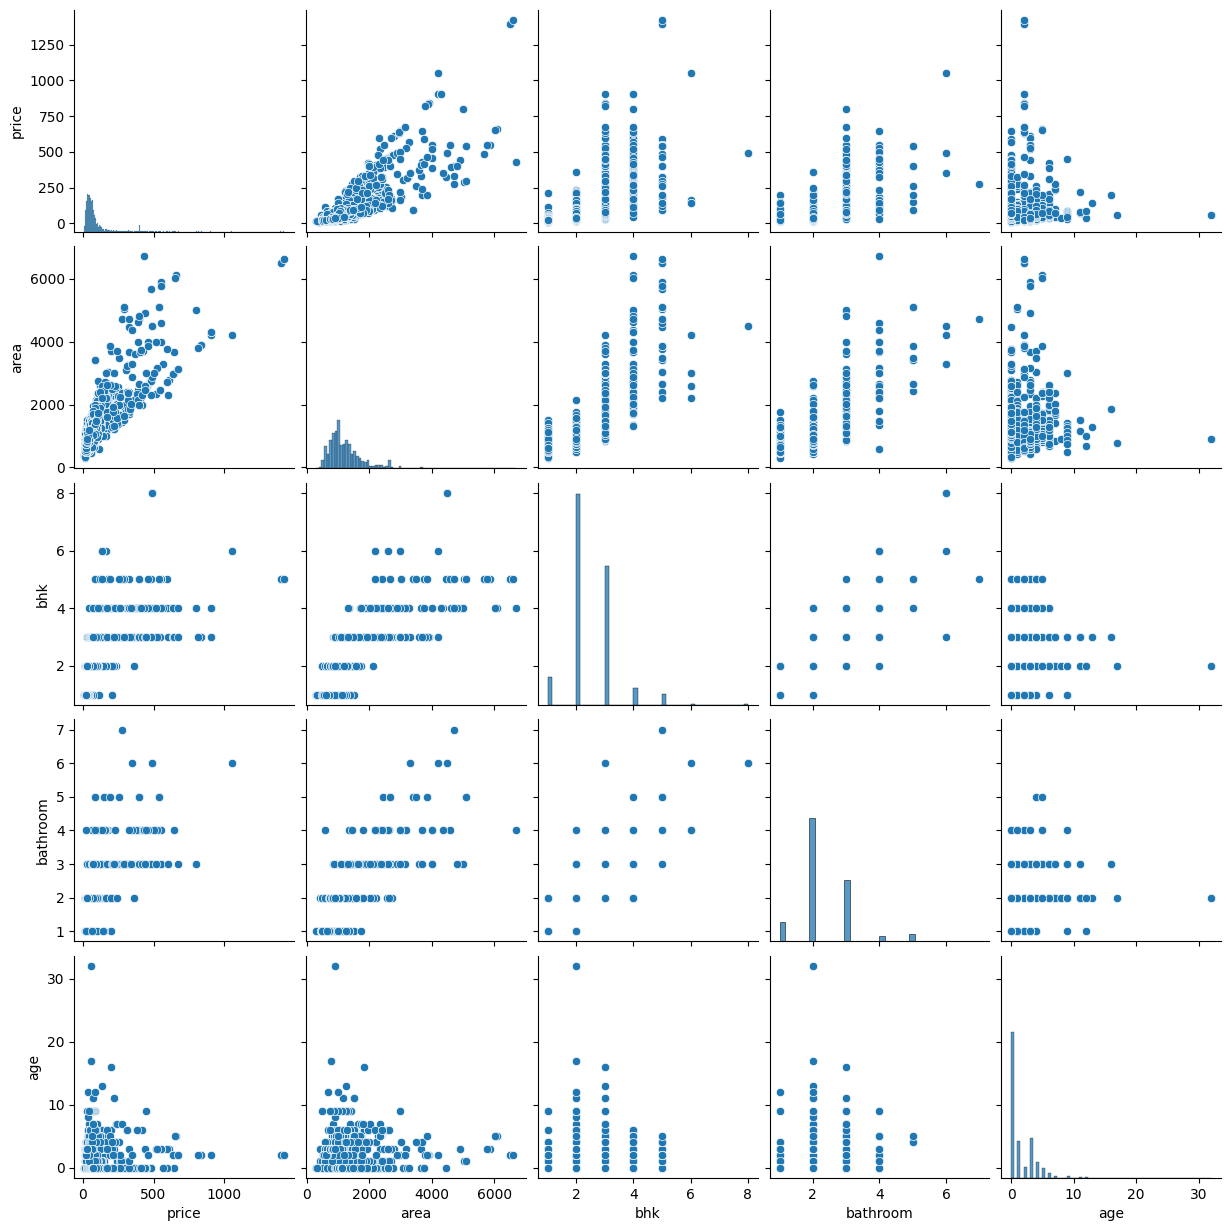

In [18]:
sns.pairplot(data)

<Axes: xlabel='bhk'>

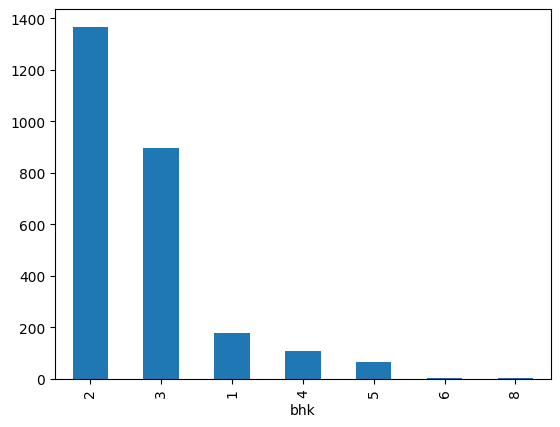

In [19]:
data.bhk.value_counts().plot(kind='bar')

<Axes: ylabel='location'>

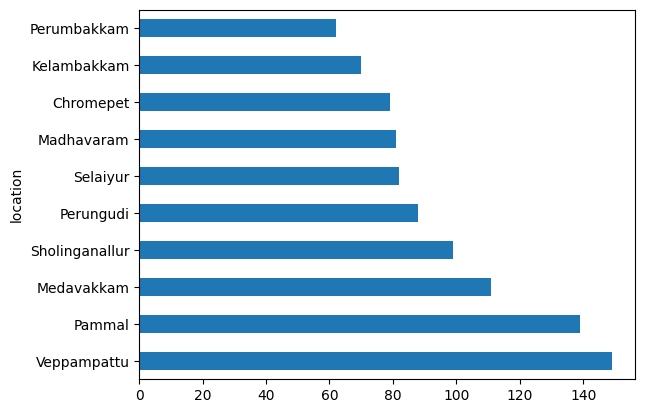

In [42]:
data.location.value_counts().nlargest(10).plot(kind='barh')

In [47]:
data.groupby('bhk').sum()

,price,area,status,bathroom,age,location,builder
bhk,,,,,,,
1,5228.07,112506,Under ConstructionUnder ConstructionUnder Cons...,168.0,204.0,ThirumazhisaiPerungalathurThirumazhisaiSembakk...,Vijay Raja Homes Private LimitedIsha HomesVija...
2,73473.06,1318656,Ready to moveReady to moveUnder ConstructionUn...,1474.0,1267.0,SembakkamAmbatturPallavaramPerungalathurPammal...,MP DevelopersDugar Housing BuildersRadiance Re...
3,105708.55,1382027,Under ConstructionUnder ConstructionUnder Cons...,1230.0,680.0,SelaiyurMogappairVirugambakkamThirumazhisaiMoo...,DAC PromotersCasagrand Builder Private Limited...
4,30813.19,303847,Ready to moveReady to moveUnder ConstructionUn...,154.0,151.0,OttiyambakkamNavallurT NagarGuindySholinganall...,Jones foundation private limitedOlympia GroupL...
5,28149.00,223238,Under ConstructionUnder ConstructionReady to m...,258.0,41.0,GuindyMogappairKanathur ReddikuppamKanathur Re...,Puravankara LimitedCasagrand Builder Private L...
6,1495.00,11990,Ready to moveReady to moveReady to moveReady t...,14.0,0.0,MadipakkamKolathurKolathurT Nagar,sellersellersellerShree sakthivel realestate
8,980.00,9000,Ready to moveReady to move,12.0,0.0,RoyapettahRoyapettah,sellerseller


In [48]:
#converting price lakhs to rupees
data['price']=data['price']*100000

In [49]:
data.price

0        3749000.0
1        9354000.0
2       15100000.0
3        4900000.0
4        4228000.0
           ...    
2615     2750000.0
2616     2750000.0
2617     3000000.0
2618     3150000.0
2619     3400000.0
Name: price, Length: 2620, dtype: float64

In [50]:
# Encoding the Categorical variable values into Numerical values
data.status.unique()

array(['Ready to move', 'Under Construction'], dtype=object)

In [51]:
enc=LabelEncoder()
data['status']=enc.fit_transform(data['status'])

In [52]:
data['status'].unique()

array([0, 1])

In [53]:
data.location.unique()

array(['Sembakkam', 'Selaiyur', 'Mogappair', 'Ambattur', 'Pallavaram',
       'Virugambakkam', 'Thirumazhisai', 'Moolakadai', 'Ottiyambakkam',
       'Perungalathur', 'Gerugambakkam', 'Anna Nagar', 'Gopalapuram',
       'Pammal', 'Porur', 'Navallur', 'Sholinganallur', 'Vanagaram',
       'T Nagar', 'Guindy', 'Madipakkam', 'Perumbakkam', 'Velachery',
       'Medavakkam', 'Gowrivakkam', 'Chromepet', 'Thalambur', 'Thandalam',
       'Ayanambakkam', 'Kanathur Reddikuppam', 'Adyar', 'Kolapakkam',
       'Thaiyur', 'Thoraipakkam OMR', 'Poonamallee', 'Padur',
       'East Tambaram', 'Tiruvottiyur', 'Iyappanthangal', 'Padappai',
       'Mugalivakkam', 'Kelambakkam', 'Thirumullaivoyal', 'Madhavaram',
       'Kundrathur', 'Vengaivasal', 'Siruseri', 'Manapakkam',
       'Karapakkam', 'Sithalapakkam', 'Madambakkam', 'Perungudi',
       'Vadapalani', 'Alwarpet', 'Thiruvidandhai', 'Kotturpuram',
       'Velappanchavadi', 'Kilpauk', 'Besant Nagar', 'Vellakkal', 'Avadi',
       'Kolathur', 'Thiruvanmi

In [54]:
data=pd.get_dummies(data,columns=['location','builder'],dtype=float)

In [55]:
data

,price,area,status,bhk,bathroom,age,location_Adambakam,location_Adyar,location_Agaramthen,location_Alandur,...,builder_Vinay Asrani,builder_Vishal D,builder_Vishnu Foundation Ltd,builder_Yadhav constructions real estates,builder_chris,builder_mohammed,builder_seller,builder_smartassetsindia,builder_vinoth builders,builder_viswaraj
0,3749000.0,872,0,2,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9354000.0,1346,1,3,2.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15100000.0,2225,1,3,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4900000.0,1028,0,2,2.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4228000.0,588,1,2,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2615,2750000.0,750,0,2,2.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2616,2750000.0,750,0,2,2.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2617,3000000.0,800,0,2,2.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2618,3150000.0,850,0,2,2.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Columns: 319 entries, price to builder_viswaraj
dtypes: float64(316), int32(1), int64(2)
memory usage: 6.4 MB


In [57]:
data.isna().sum()

price                          0
area                           0
status                         0
bhk                            0
bathroom                    1217
                            ... 
builder_mohammed               0
builder_seller                 0
builder_smartassetsindia       0
builder_vinoth builders        0
builder_viswaraj               0
Length: 319, dtype: int64

In [58]:
val_1=data.bathroom.mode()[0]
val2=data.age.mode()[0]
data.bathroom.fillna(val_1,inplace=True)
data.age.fillna(val2,inplace=True)

In [59]:
data.isna().sum()

price                       0
area                        0
status                      0
bhk                         0
bathroom                    0
                           ..
builder_mohammed            0
builder_seller              0
builder_smartassetsindia    0
builder_vinoth builders     0
builder_viswaraj            0
Length: 319, dtype: int64

In [60]:
data.describe()

,price,area,status,bhk,bathroom,age,location_Adambakam,location_Adyar,location_Agaramthen,location_Alandur,...,builder_Vinay Asrani,builder_Vishal D,builder_Vishnu Foundation Ltd,builder_Yadhav constructions real estates,builder_chris,builder_mohammed,builder_seller,builder_smartassetsindia,builder_vinoth builders,builder_viswaraj
count,2.620000e+03,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000,...,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000
mean,9.383468e+06,1282.925191,0.432443,2.443893,2.192366,0.894275,0.003053,0.004198,0.002672,0.001908,...,0.009160,0.001908,0.003435,0.000382,0.000763,0.001527,0.184733,0.006107,0.000763,0.020229
std,1.136093e+07,692.566319,0.495510,0.811984,0.643660,1.824666,0.055184,0.064672,0.051630,0.043652,...,0.095288,0.043652,0.058520,0.019537,0.027624,0.039051,0.388155,0.077922,0.027624,0.140810
min,1.283000e+06,300.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.200000e+06,877.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.173500e+06,1091.500000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000e+06,1471.250000,1.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.422000e+08,6700.000000,1.000000,8.000000,7.000000,32.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
data.head(5)

,price,area,status,bhk,bathroom,age,location_Adambakam,location_Adyar,location_Agaramthen,location_Alandur,...,builder_Vinay Asrani,builder_Vishal D,builder_Vishnu Foundation Ltd,builder_Yadhav constructions real estates,builder_chris,builder_mohammed,builder_seller,builder_smartassetsindia,builder_vinoth builders,builder_viswaraj
0,3749000.0,872,0,2,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9354000.0,1346,1,3,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15100000.0,2225,1,3,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4900000.0,1028,0,2,2.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4228000.0,588,1,2,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
data.tail(6)

,price,area,status,bhk,bathroom,age,location_Adambakam,location_Adyar,location_Agaramthen,location_Alandur,...,builder_Vinay Asrani,builder_Vishal D,builder_Vishnu Foundation Ltd,builder_Yadhav constructions real estates,builder_chris,builder_mohammed,builder_seller,builder_smartassetsindia,builder_vinoth builders,builder_viswaraj
2614,2700000.0,800,0,2,2.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2615,2750000.0,750,0,2,2.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2616,2750000.0,750,0,2,2.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2617,3000000.0,800,0,2,2.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2618,3150000.0,850,0,2,2.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2619,3400000.0,900,0,2,2.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
data.columns

Index(['price', 'area', 'status', 'bhk', 'bathroom', 'age',
       'location_Adambakam', 'location_Adyar', 'location_Agaramthen',
       'location_Alandur',
       ...
       'builder_Vinay Asrani', 'builder_Vishal D',
       'builder_Vishnu Foundation Ltd',
       'builder_Yadhav constructions real estates', 'builder_chris',
       'builder_mohammed', 'builder_seller', 'builder_smartassetsindia',
       'builder_vinoth builders', 'builder_viswaraj'],
      dtype='object', length=319)

In [64]:
data.corr()

,price,area,status,bhk,bathroom,age,location_Adambakam,location_Adyar,location_Agaramthen,location_Alandur,...,builder_Vinay Asrani,builder_Vishal D,builder_Vishnu Foundation Ltd,builder_Yadhav constructions real estates,builder_chris,builder_mohammed,builder_seller,builder_smartassetsindia,builder_vinoth builders,builder_viswaraj
price,1.000000,0.823508,-0.054780,0.617898,0.420589,-0.003029,-0.012965,0.114216,-0.004026,-0.005546,...,0.515829,0.000489,-0.023940,0.005017,-0.018015,-0.021142,0.050146,0.006523,-0.004964,-0.085050
area,0.823508,1.000000,-0.071966,0.785474,0.499814,0.011955,-0.039027,0.067149,0.040306,-0.022300,...,0.286975,-0.010263,-0.031620,0.010359,-0.015285,-0.024265,0.006689,0.032767,-0.004308,-0.065602
status,-0.054780,-0.071966,1.000000,-0.031251,-0.165151,-0.427888,-0.034344,-0.009018,-0.045179,0.014789,...,-0.051582,0.050094,0.067260,0.022386,-0.024126,-0.034133,-0.224929,-0.068423,0.031664,0.033275
bhk,0.617898,0.785474,-0.031251,1.000000,0.643103,-0.035833,-0.055824,0.066292,0.035455,-0.013137,...,0.115213,-0.002364,-0.016031,0.013385,-0.015113,-0.021381,0.059551,0.035591,0.001910,-0.131999
bathroom,0.420589,0.499814,-0.165151,0.643103,1.000000,-0.026891,-0.048792,0.053971,0.064956,-0.013071,...,-0.010065,-0.013071,0.002724,0.024523,-0.008262,-0.011689,0.172535,0.037471,-0.029737,-0.038739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
builder_mohammed,-0.021142,-0.024265,-0.034133,-0.021381,-0.011689,0.023701,-0.002164,-0.002539,-0.002024,-0.001710,...,-0.003760,-0.001710,-0.002296,-0.000764,-0.001081,1.000000,-0.018614,-0.003065,-0.001081,-0.005619
builder_seller,0.050146,0.006689,-0.224929,0.059551,0.172535,0.089045,-0.008518,0.014723,-0.024638,0.069325,...,-0.045769,-0.020815,-0.027947,-0.009302,-0.013157,-0.018614,1.000000,-0.037313,-0.013157,-0.068399
builder_smartassetsindia,0.006523,0.032767,-0.068423,0.035591,0.037471,0.012599,-0.004338,-0.005090,-0.004057,-0.003428,...,-0.007537,-0.003428,-0.004602,-0.001532,-0.002167,-0.003065,-0.037313,1.000000,-0.002167,-0.011263
builder_vinoth builders,-0.004964,-0.004308,0.031664,0.001910,-0.029737,-0.013549,-0.001530,-0.001795,-0.001431,-0.001209,...,-0.002658,-0.001209,-0.001623,-0.000540,-0.000764,-0.001081,-0.013157,-0.002167,1.000000,-0.003972


In [65]:
x=data.drop('price',axis=1)
y=data.price

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [71]:
models={'LinearRegression':LinearRegression(),
        'DecisionTreeRegressor':DecisionTreeRegressor(),
        'SVR':SVR(),
        'RandomForestRegressor':RandomForestRegressor(),
        'ExtraTreesRegressor':ExtraTreesRegressor(),
        'GradientBoostingRegressor':GradientBoostingRegressor()
}

In [78]:
report={}
for i in range(len(list(models.keys()))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc_score=r2_score(y_test,y_pred)*100
    mse=mean_squared_error(y_test,y_pred)*100
    mae=mean_absolute_error(y_test,y_pred)*100
    rmse=np.sqrt(mse)
    report[list(models.keys())[i]]={'model':list(models.values())[i],'accuracy_score':acc_score,'mean_square_error':mse,'mean_absolute_error':mae,'root_mean_square_error':rmse}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [79]:
report

{'LinearRegression': {'model': LinearRegression(),
  'accuracy_score': -6119116020684410.0,
  'mean_square_error': 9.087404554304263e+29,
  'mean_absolute_error': 799441458847533.1,
  'root_mean_square_error': 953278792080483.9},
 'DecisionTreeRegressor': {'model': DecisionTreeRegressor(),
  'accuracy_score': 91.26526843522322,
  'mean_square_error': 1297181474155123.8,
  'mean_absolute_error': 122263926.43262872,
  'root_mean_square_error': 36016405.625147045},
 'SVR': {'model': SVR(),
  'accuracy_score': -7.776652834877917,
  'mean_square_error': 1.6005744007935612e+16,
  'mean_absolute_error': 532701264.4137181,
  'root_mean_square_error': 126513809.55427597},
 'RandomForestRegressor': {'model': RandomForestRegressor(),
  'accuracy_score': 92.59574090378668,
  'mean_square_error': 1099595065769823.2,
  'mean_absolute_error': 121050628.1318778,
  'root_mean_square_error': 33160142.72842961},
 'ExtraTreesRegressor': {'model': ExtraTreesRegressor(),
  'accuracy_score': 95.0689864627641

In [89]:
accuracy=0
for i in range(len(list(report))):
    if accuracy < list(report.values())[i]['accuracy_score']:
        accuracy=list(report.values())[i]['accuracy_score']
        final_model=list(report.values())[i]['model']

In [91]:
final_model.fit(x_train,y_train)

ExtraTreesRegressor()

In [93]:
y_prediction=final_model.predict(x_test)

In [94]:
r2_score(y_prediction,y_test)

0.9524258783315573

In [143]:
prediction=[]
for i in  y_prediction:
    prediction.append(round(i,2))
prediction_data_frame=pd.DataFrame({'predicted':prediction,'original_value':y_test})
prediction_data_frame.reset_index(drop=True,inplace=True)

In [144]:
prediction_data_frame

,predicted,original_value
0,2457630.00,2402000.0
1,3500000.00,3500000.0
2,4176396.67,5300000.0
3,9379570.00,9478000.0
4,7657000.00,7657000.0
...,...,...
781,2480000.00,2600000.0
782,39800000.00,39800000.0
783,1699000.00,1700000.0
784,5060370.00,4826000.0
